In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dia.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Incorrect values
Logically, the values of: 
- Glucose
- Blood pressure 
- Skin thickness 
- Insulin 
- BMI 
should not have a value of '0'. 
Hence, any '0' values are considered as NaN values

In [5]:
nan_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

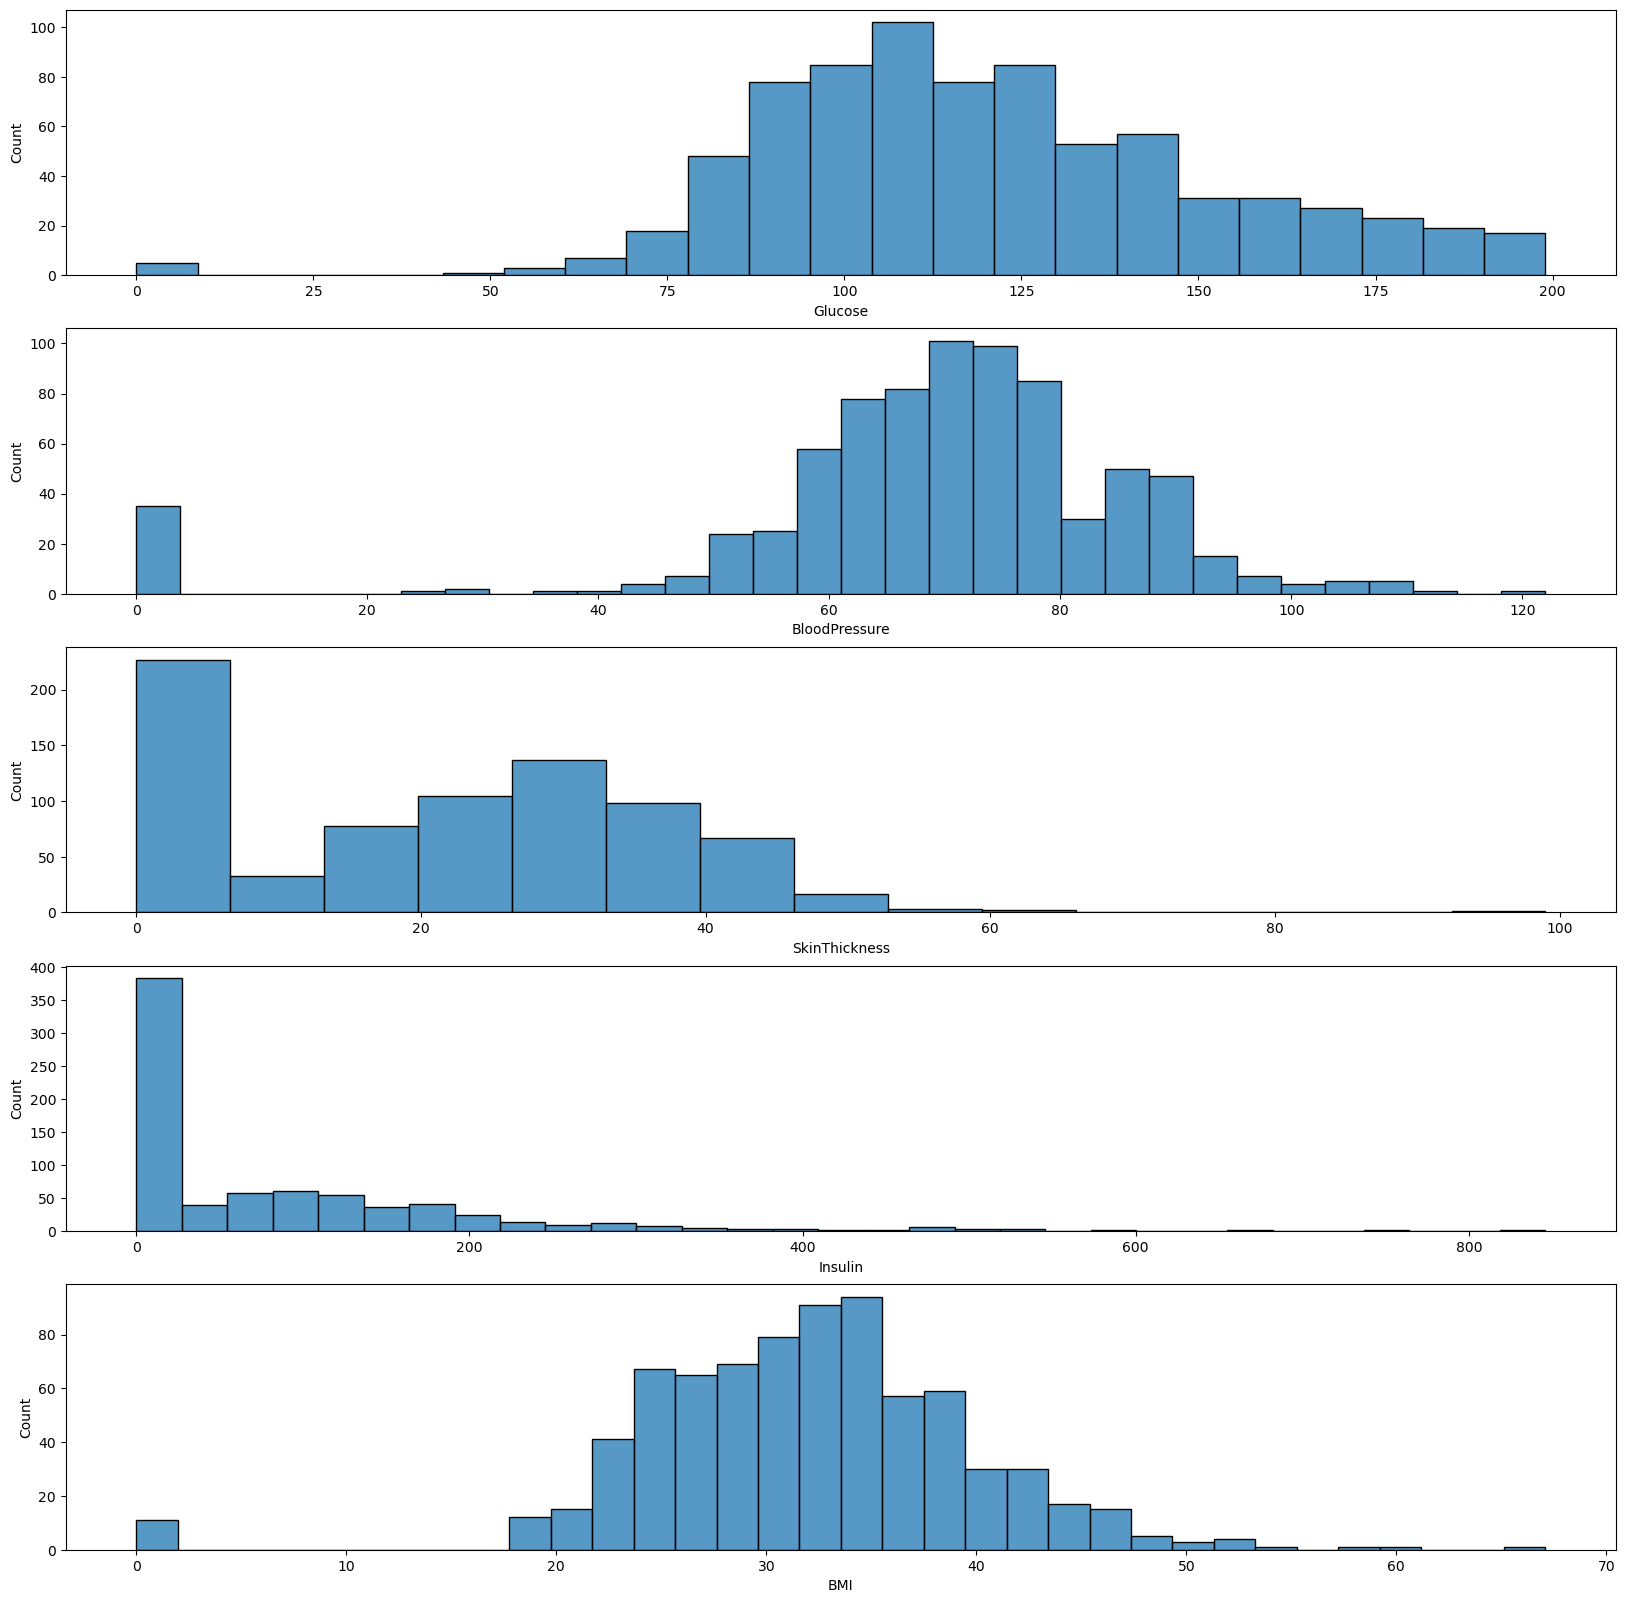

In [6]:
fig, axes = plt.subplots(5, figsize=(20, 20))
for i in range (0,5):
    sns.histplot(ax=axes[i] ,data = df, x = nan_cols[i])

In [7]:
df[nan_cols] = df[nan_cols].replace(0, np.nan)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

As seen from the above data description, it is seen that the minimum value is no longer '0'. 

From the above histogram analysis, It is seen that insulin is highly skewed, and the rest are normally distributed. 
To fill the NaN values, median is used for highly skewed data, whereas mean is used for the rest. 

In [10]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())

<AxesSubplot:ylabel='count'>

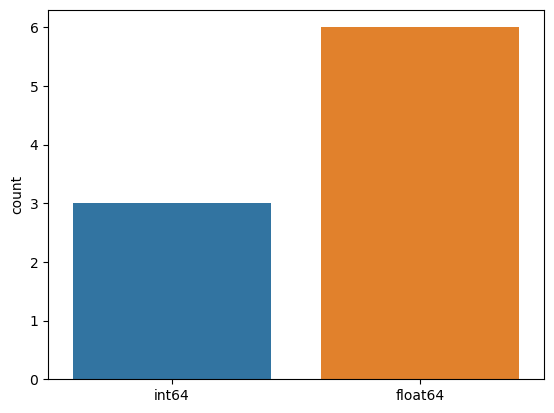

In [11]:
sns.countplot(data=df, x=df.dtypes)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

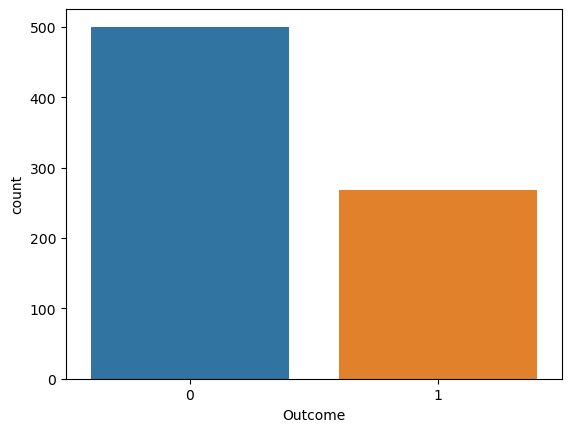

In [12]:
sns.countplot(data = df, x='Outcome')

It clear from the countplot that the data is highly imbalanced. It can be challenging for the machine learning model to perform well for the minority class. Hence, here we use borderline-SMOTE to tackle the issue. 

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
from imblearn.over_sampling import BorderlineSMOTE
# transform the dataset
oversample = BorderlineSMOTE()
X, Y = oversample.fit_resample(x, y)
from collections import Counter
counter = Counter(Y)
print (counter)

Counter({1: 500, 0: 500})


<AxesSubplot:xlabel='Outcome', ylabel='count'>

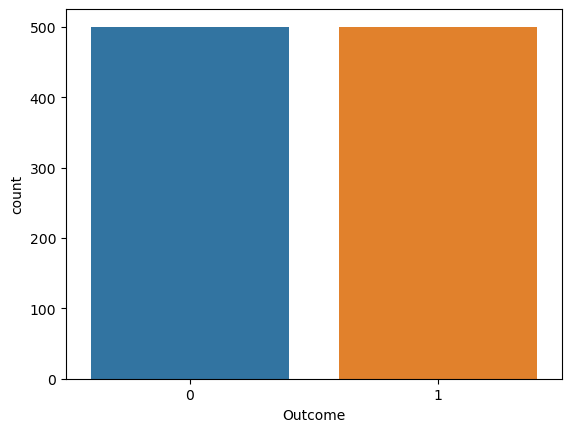

In [15]:
sns.countplot(x=Y)

In [16]:
df_new = pd.concat([X, Y], axis=1)
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,8,112.293720,77.317488,37.682512,117.623092,28.262309,0.515827,30,1
996,4,134.537602,95.820799,38.820799,50.100397,30.583520,1.160284,35,1
997,5,122.046820,79.066096,31.556928,125.000000,39.910445,0.326388,37,1
998,4,115.000000,75.101713,29.153420,125.000000,30.683485,0.350411,44,1


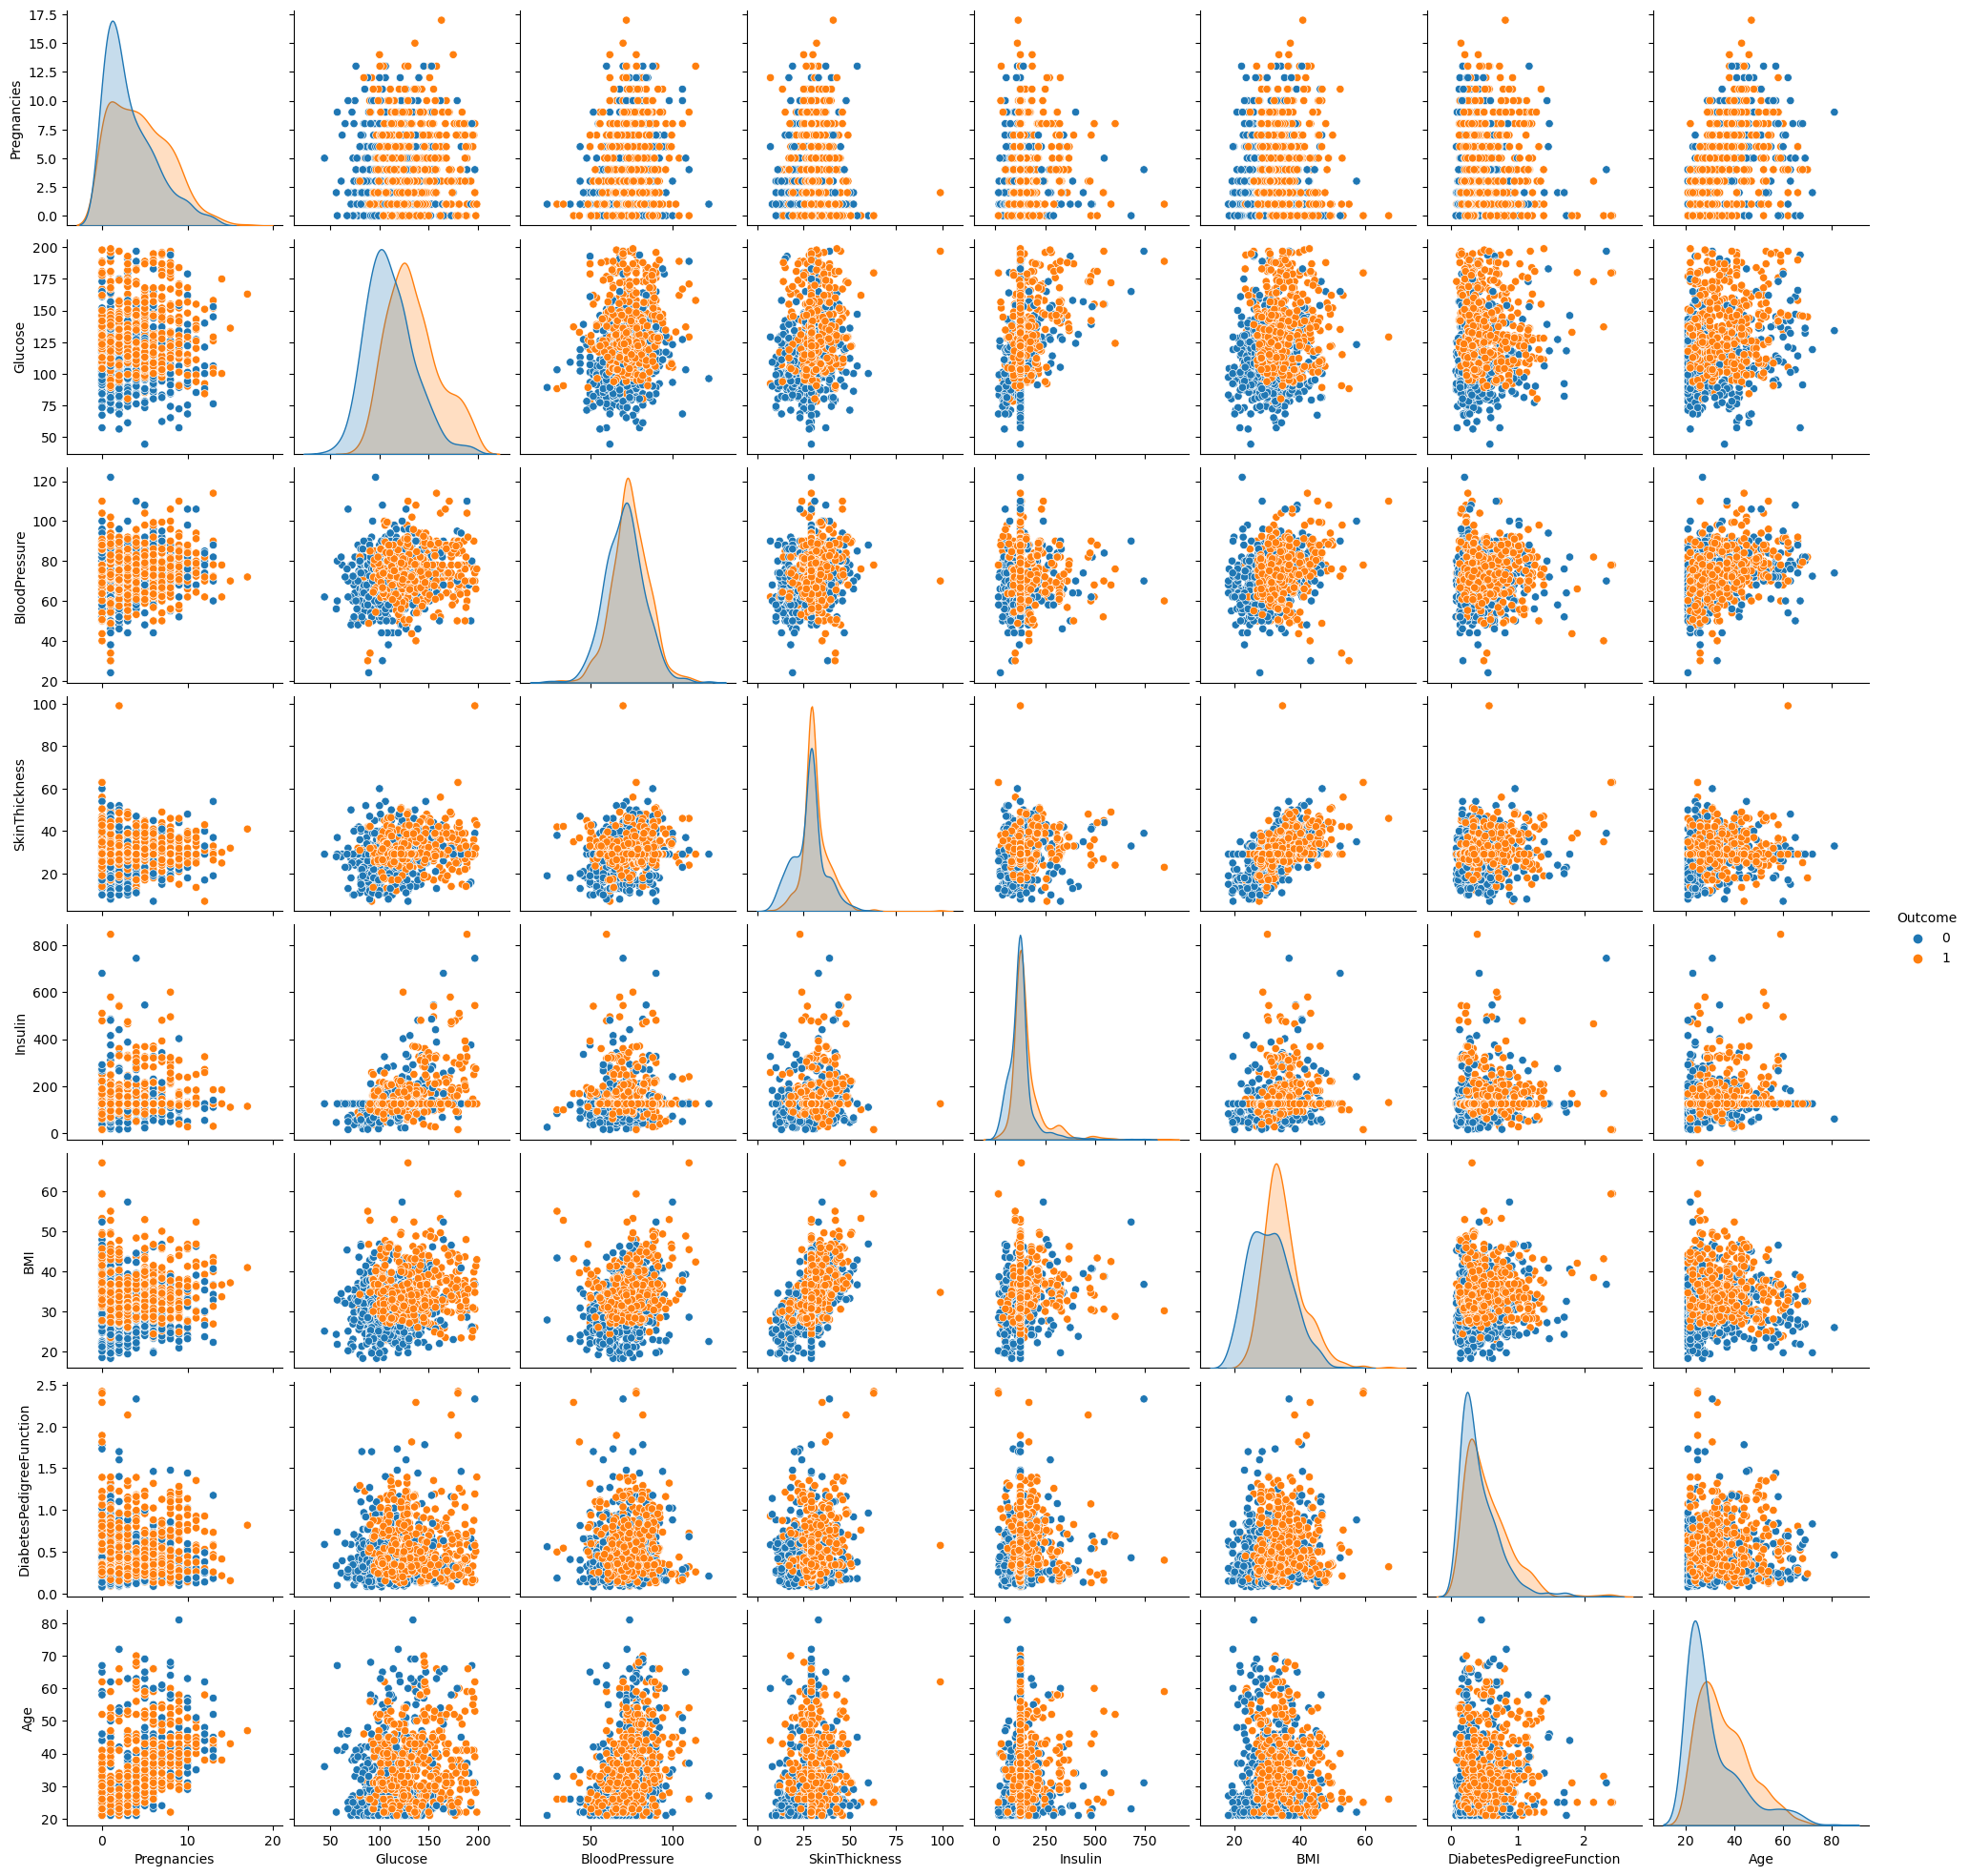

In [17]:
sns.pairplot(data=df_new, hue='Outcome')

<AxesSubplot:>

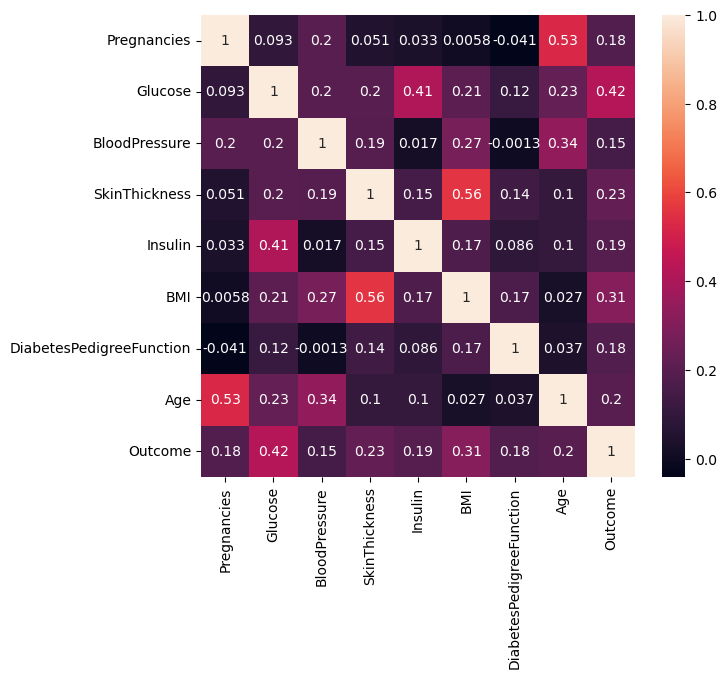

In [18]:
plt.figure(figsize=(7,6))
sns.heatmap(data = df_new.corr(), annot = True)

In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.419064,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.154678,0.542398,0.100966,0.127872,0.215299
Insulin,0.025047,0.419064,0.045087,0.154678,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230941,0.281268,0.542398,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.203790,0.311924,0.173844,0.238356,1.000000


In [20]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=0)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100  26]
 [ 34  90]]


0.76

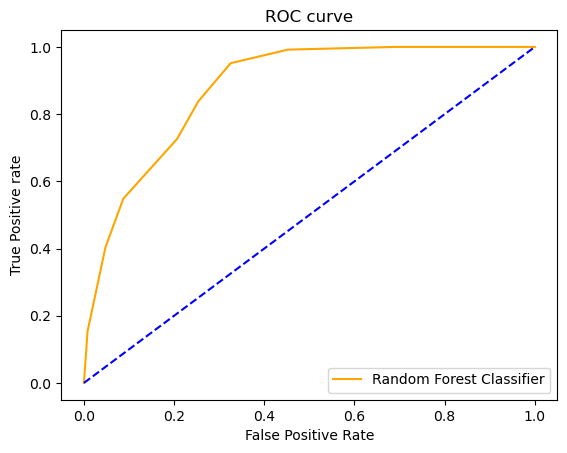

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob = classifier.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr ,color='orange', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')



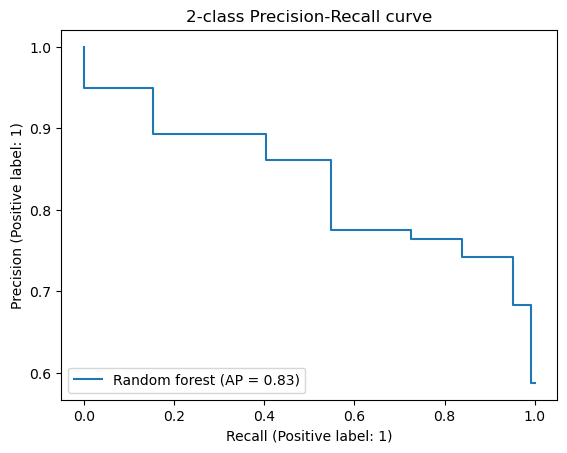

In [26]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="Random forest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [27]:
from sklearn.model_selection import GridSearchCV, cross_val_score
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [28]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200,
 'random_state': 18}

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 'log2', max_depth = 8,random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=200, random_state=0)

In [51]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102  24]
 [  7 117]]


0.876

In [52]:


pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr1, p_tpr1, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

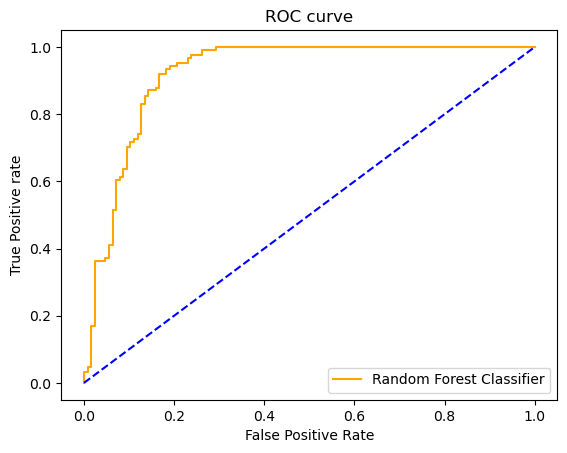

In [53]:

plt.plot(fpr1, tpr1,color='orange', label='Random Forest Classifier')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

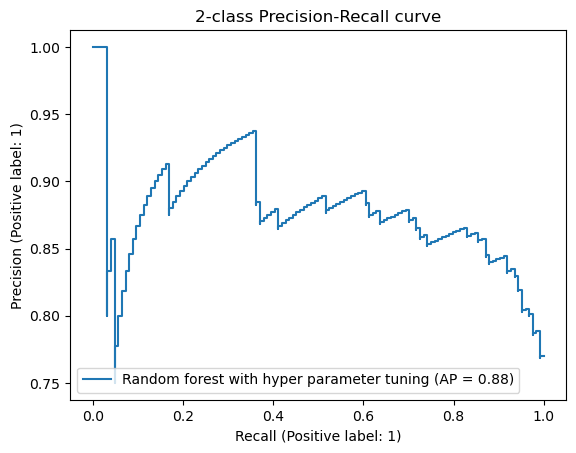

In [54]:


display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="Random forest with hyper parameter tuning")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', probability = True, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[93 33]
 [33 91]]


0.736

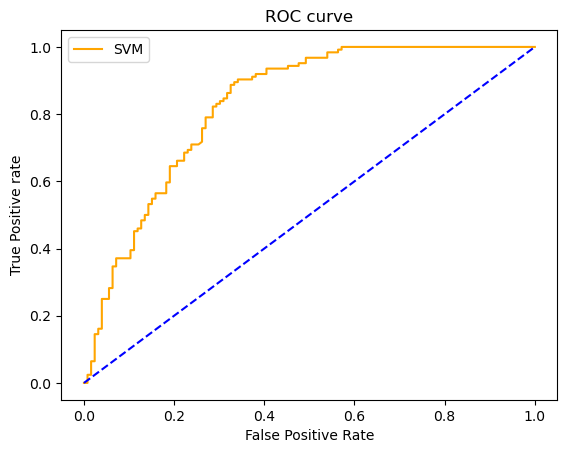

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob2 = classifier.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr2, tpr2 ,color='orange', label='SVM')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

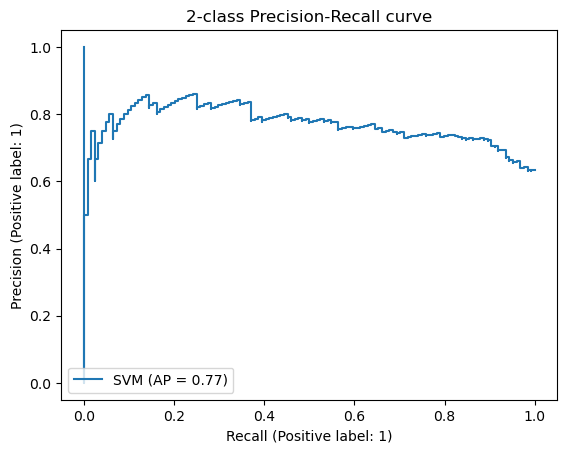

In [57]:
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="SVM")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [58]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.533 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C=1, gamma = 0.01, probability = True, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[109  17]
 [ 40  84]]


0.772

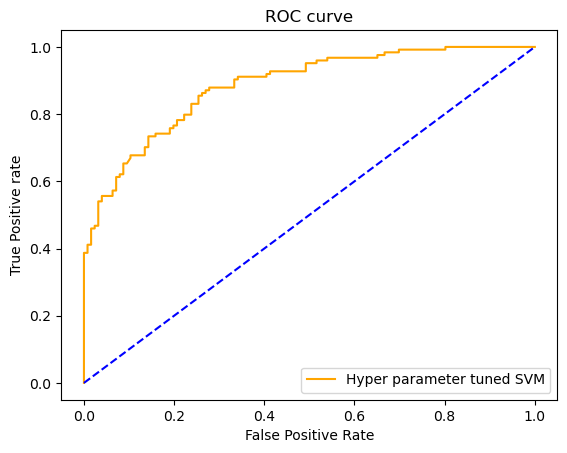

In [63]:


pred_prob3 = classifier.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr3, p_tpr3, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

plt.plot(fpr3, tpr3 ,color='orange', label='Hyper parameter tuned SVM')
plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

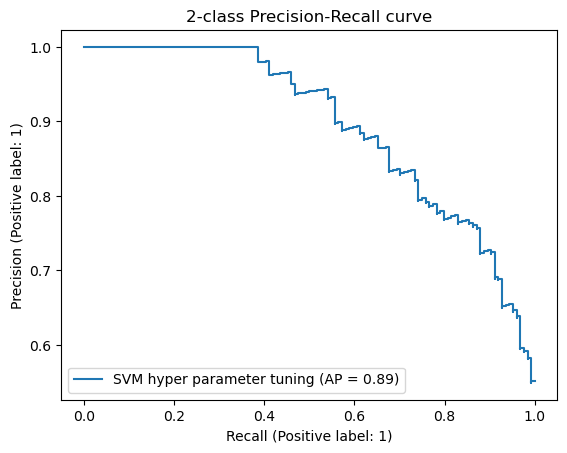

In [64]:
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="SVM hyper parameter tuning")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [65]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102  24]
 [ 42  82]]


0.736

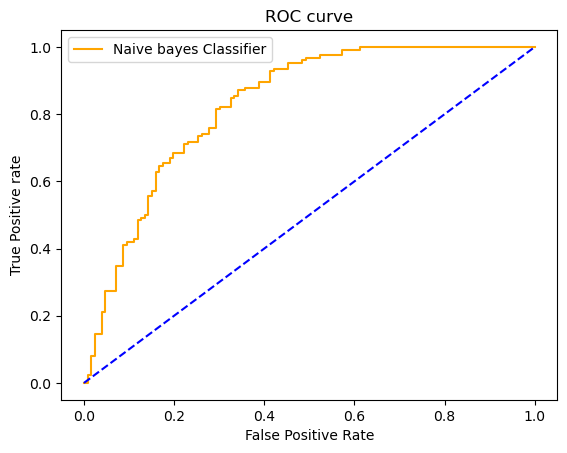

In [66]:
pred_prob4 = classifier.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr4, p_tpr4, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr4, tpr4 ,color='orange', label='Naive bayes Classifier')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

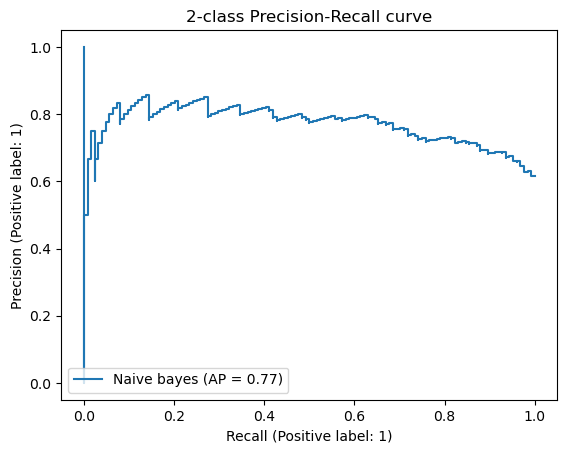

In [67]:
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="Naive bayes")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100  26]
 [ 35  89]]


0.756

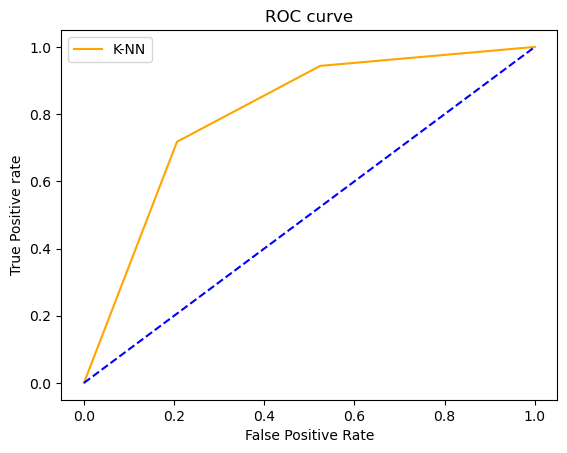

In [97]:
pred_prob6 = classifier.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr6, p_tpr6, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

plt.plot(fpr6, tpr6 ,color='orange', label='K-NN')
plt.plot(p_fpr6, p_tpr6, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

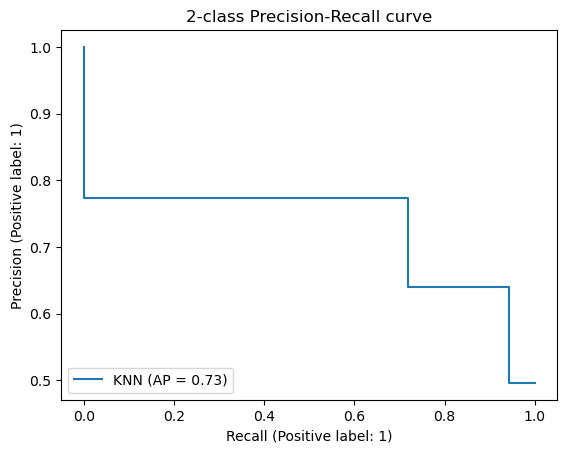

In [98]:
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="KNN")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [91]:
import warnings
warnings.filterwarnings("ignore")
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1)
  
grid_search=grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
{'n_neighbors': 1}


In [103]:
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 89  37]
 [ 22 102]]


0.764

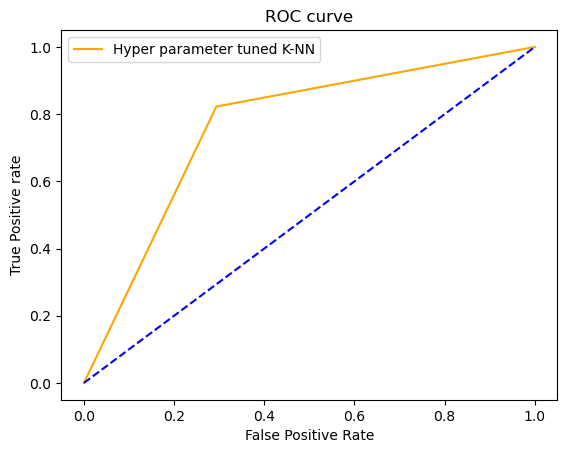

In [104]:
pred_prob7 = classifier.predict_proba(X_test)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr7, p_tpr7, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score4 = roc_auc_score(y_test, pred_prob7[:,1])

plt.plot(fpr7, tpr7 ,color='orange', label='Hyper parameter tuned K-NN')
plt.plot(p_fpr7, p_tpr7, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

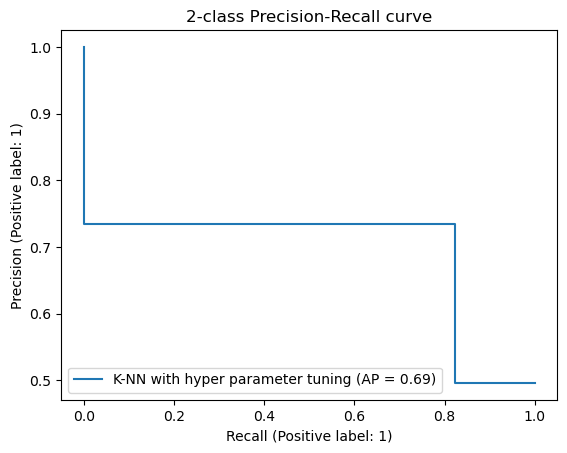

In [105]:
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="K-NN with hyper parameter tuning")
_ = display.ax_.set_title("2-class Precision-Recall curve")

Text(0, 0.5, 'True Positive rate')

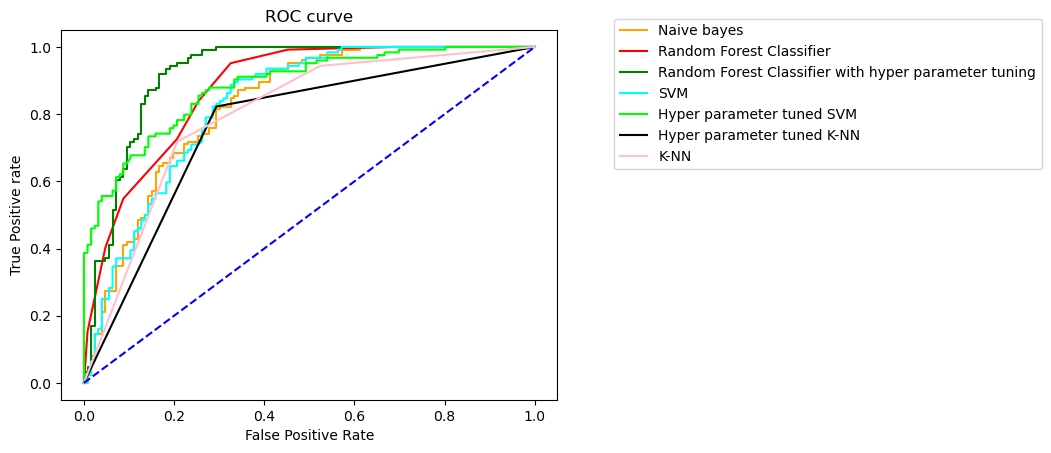

In [111]:
plt.plot(fpr4, tpr4 ,color='orange', label='Naive bayes')
plt.plot(fpr, tpr ,color='red', label='Random Forest Classifier')
plt.plot(fpr1, tpr1,color='green', label='Random Forest Classifier with hyper parameter tuning')
plt.plot(fpr2, tpr2 ,color='aqua', label='SVM')
plt.plot(fpr3, tpr3 ,color='lime', label='Hyper parameter tuned SVM')
plt.plot(fpr7, tpr7 ,color='black', label='Hyper parameter tuned K-NN')
plt.plot(fpr6, tpr6 ,color='pink', label='K-NN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')